In [2]:
import weave
import pandas as pd
from api2 import example_eval

In [3]:
example_eval.dataset

Dataset(name=None, description=None, rows=<weave.table.Table object at 0x16cf0a4a0>)

In [21]:
data = list(example_eval.dataset.rows)
data

[{'doc': "yes I'll join you", 'sentiment': 'positive'},
 {'doc': 'no, he did pass!', 'sentiment': 'positive'},
 {'doc': "yes, no, I'm not sure", 'sentiment': 'neutral'},
 {'doc': "It couldn't have gone better", 'sentiment': 'positive'},
 {'doc': ':( :( :(', 'sentiment': 'negative'}]

In [48]:
df = pd.DataFrame(data)
df

,doc,sentiment
0,yes I'll join you,positive
1,"no, he did pass!",positive
2,"yes, no, I'm not sure",neutral
3,It couldn't have gone better,positive
4,:( :( :(,negative


<Axes: xlabel='sentiment_simple'>

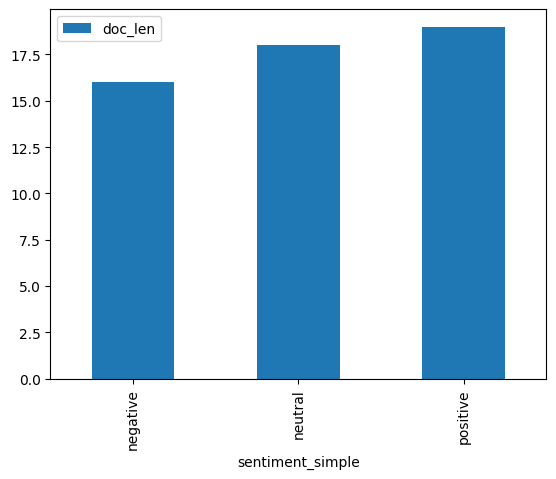

In [28]:
pd.DataFrame({'sentiment_simple': df['doc'].apply(example_eval.sentiment_simple),
              'doc_len': df['doc'].apply(len)}).groupby('sentiment_simple').mean().plot(kind='bar')

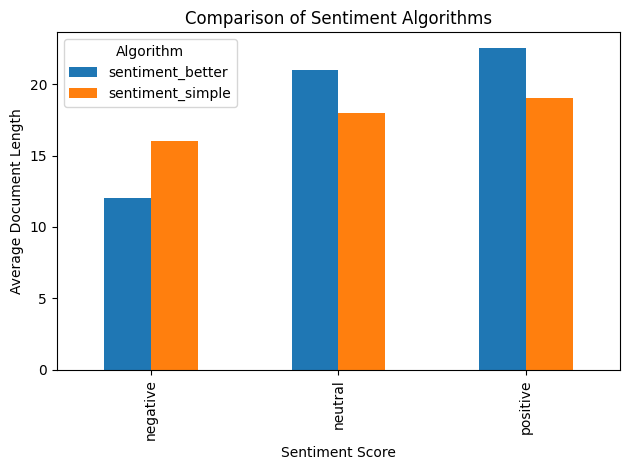

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable, List

class Vary:
    def __init__(self, *funcs: Callable):
        self.funcs = funcs
    
    def __call__(self, *args, **kwargs):
        return pd.Series({f.__name__: f(*args, **kwargs) for f in self.funcs})

result = (pd.DataFrame(dict(
                        **df['doc'].apply(Vary(example_eval.sentiment_simple, example_eval.sentiment_better)),
                        doc_len=df['doc'].apply(len)))
            .melt(id_vars=['doc_len'], var_name='algorithm', value_name='sentiment')
            .groupby(['algorithm', 'sentiment'])['doc_len']
            .mean()
            .unstack(level=0)
            .plot(kind='bar'))

plt.title('Comparison of Sentiment Algorithms')
plt.xlabel('Sentiment Score')
plt.ylabel('Average Document Length')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

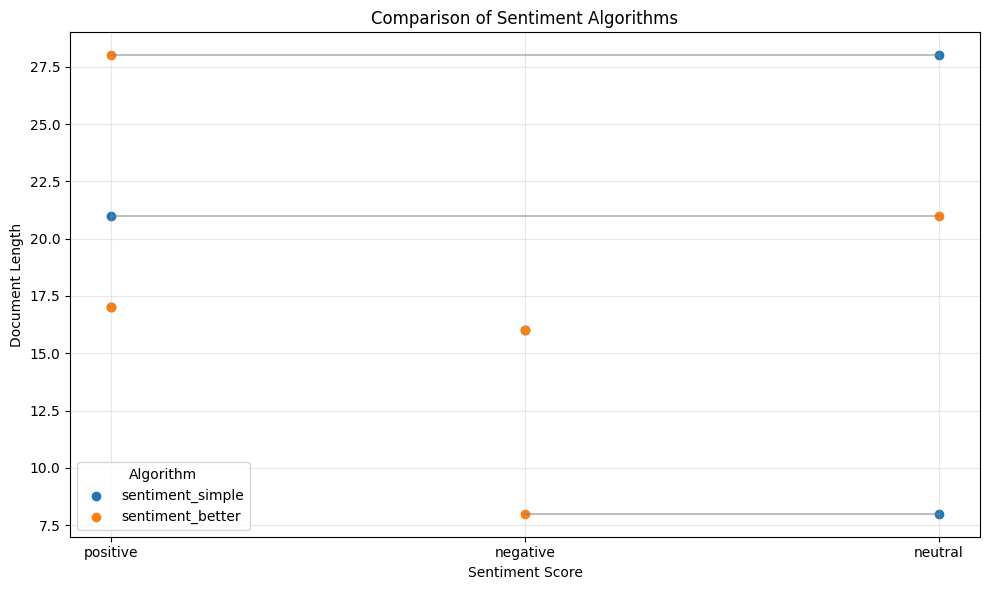

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

class Vary:
    def __init__(self, *funcs: Callable):
        self.funcs = funcs
    
    def __call__(self, *args, **kwargs):
        return pd.Series({f.__name__: f(*args, **kwargs) for f in self.funcs})

# Assuming df and example_eval are defined earlier in your code

result = (pd.DataFrame(dict(
                        **df['doc'].apply(Vary(example_eval.sentiment_simple, example_eval.sentiment_better)),
                        doc_len=df['doc'].apply(len)))
          .reset_index()
          .rename(columns={'index': 'doc_id'})
          .melt(id_vars=['doc_id', 'doc_len'], var_name='algorithm', value_name='sentiment'))

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot for each algorithm
for algo in result['algorithm'].unique():
    algo_data = result[result['algorithm'] == algo]
    plt.scatter(algo_data['sentiment'], algo_data['doc_len'], label=algo)

# Lines connecting points for each document
for doc_id in result['doc_id'].unique():
    doc_data = result[result['doc_id'] == doc_id]
    plt.plot(doc_data['sentiment'], doc_data['doc_len'], color='gray', alpha=0.5)

plt.title('Comparison of Sentiment Algorithms')
plt.xlabel('Sentiment Score')
plt.ylabel('Document Length')
plt.legend(title='Algorithm')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## result_df = pd.DataFrame(dict(
                        doc=df['doc'],
                        **df['doc'].apply(Vary(example_eval.sentiment_simple, example_eval.sentiment_better)),
                        doc_len=df['doc'].apply(len)))
result_df = result_df.melt(id_vars=['doc', 'doc_len'], var_name='algorithm', value_name='sentiment')
result_df = result_df.groupby(['algorithm', 'sentiment'])['doc_len']
result_df = result_df.mean()
# result_df = result_df.unstack(level=0)
# result_df.plot(kind='bar')
result_df

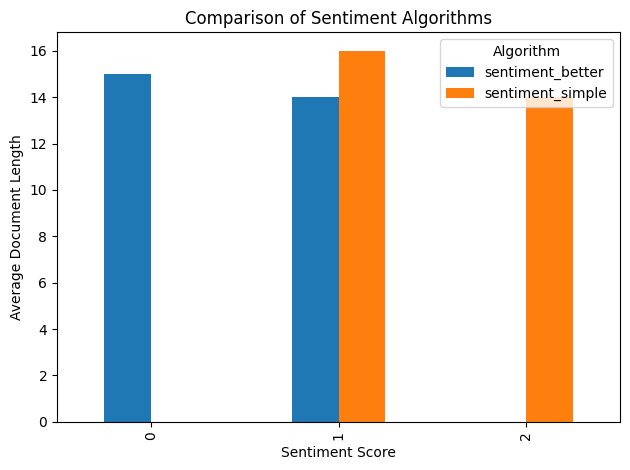

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable, List

class Vary:
    def __init__(self, *funcs: Callable):
        self.funcs = funcs
    
    def __call__(self, *args, **kwargs):
        return pd.Series([f(*args, **kwargs) for f in self.funcs], index=[f.__name__ for f in self.funcs])

# Example sentiment functions
def sentiment_simple(text: str) -> int:
    return len(text) % 3

def sentiment_better(text: str) -> int:
    return len(text) % 2

# Your data
df = pd.DataFrame({'doc': ["yes I'll join you", 'no, he did pass!', 'maybe later', 'absolutely not']})

# Using Vary in a pandas operation
result = (df.assign(**{f.__name__: df['doc'].apply(f) for f in Vary(sentiment_simple, sentiment_better).funcs})
            .assign(doc_len=lambda x: x['doc'].str.len())
            .melt(id_vars=['doc', 'doc_len'], var_name='algorithm', value_name='sentiment')
            .groupby(['algorithm', 'sentiment'])['doc_len']
            .mean()
            .unstack(level=0))

# Plot the result
result.plot(kind='bar')
plt.title('Comparison of Sentiment Algorithms')
plt.xlabel('Sentiment Score')
plt.ylabel('Average Document Length')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()